# Siddharth K. Nagaraj
**Dataset:** DARWIN handwriting (AD vs. control)

### Problem Statement
Classify Alzheimer's Disease (P) vs Healthy Controls (H) using handwriting features from the DARWIN dataset (25 tasks$*$18 features per task per subject).

- Supervised binary classification (P vs H).
- Tabular features: timing, speed, acceleration, jerk, pressure, tremor, spatial dispersion, etc., for each task.

**References:** </br>
$^1$N. D. Cilia, C. De Stefano, F. Fontanella, A. S. Di Freca, An experimental protocol to support cognitive impairment diagnosis by using handwriting analysis, Procedia Computer Science 141 (2018) 466–471. https://doi.org/10.1016/j.procs.2018.10.141

$^2$N. D. Cilia, G. De Gregorio, C. De Stefano, F. Fontanella, A. Marcelli, A. Parziale, Diagnosing Alzheimer’s disease from online handwriting: A novel dataset and performance benchmarking, Engineering Applications of Artificial Intelligence, Vol. 111 (20229) 104822. https://doi.org/10.1016/j.engappai.2022.104822

$^3$Fontanella, F. (2022). DARWIN [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C55D0K.

$^4$SHAP Documentation. https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Basic%20SHAP%20Interaction%20Value%20Example%20in%20XGBoost.html

$^5$Kaggle open-source. https://www.kaggle.com/code/ahmedabdulhamid/best-n-estimators-for-randomforest/notebook

# Data Loading and Inspection/Exploration

In [1]:
# Install ucimlrepo
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
darwin = fetch_ucirepo(id=732)

# data (as pandas dataframes)
X = darwin.data.features
y = darwin.data.targets

# metadata
print(darwin.metadata)

# variable information
print(darwin.variables)

{'uci_id': 732, 'name': 'DARWIN', 'repository_url': 'https://archive.ics.uci.edu/dataset/732/darwin', 'data_url': 'https://archive.ics.uci.edu/static/public/732/data.csv', 'abstract': 'The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 174, 'num_features': 451, 'feature_types': [], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C55D0K', 'creators': ['Francesco Fontanella'], 'intro_paper': {'ID': 132, 'type': 'NATIVE', 'title': 'Diagnosing Alzheimer’s disease from on-line handwriting: A novel dataset and performance benchmarking', 'authors': 'Nicole D. Cilia, Giuseppe De Gregorio , Claudio De St

In [3]:
display(X.head())
print(X.info())

display(y.head())
print(y.info())

print(f"X missing data: {X.isna().sum().sum()}")
print(f"y missing data: {y.isna().sum().sum()}")

print("feature shape (X):", X.shape)
print("target shape (y):", y.shape)

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, ID to total_time25
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB
None


,class
0,P
1,P
2,P
3,P
4,P


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   174 non-null    object
dtypes: object(1)
memory usage: 1.5+ KB
None
X missing data: 0
y missing data: 0
feature shape (X): (174, 451)
target shape (y): (174, 1)


We can see that y contains an 'object' type which will need encoding. We have 174 subjects but 450 features (excluding the ID col) which means that there is a p >> n problem here. </br>
There is no missing data in X and y. </br>
There are 174 subjects, 25 tasks, and 18 features per task$^1$.


In [4]:
print(y['class'].value_counts())

desc = X.describe().T
display(desc.head(19))

class
P    89
H    85
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
air_time1,174.0,5664.166667,12653.772746,65.000000,1697.500000,2890.000000,4931.250000,109965.000000
disp_index1,174.0,0.000010,0.000003,0.000002,0.000008,0.000009,0.000011,0.000028
gmrt_in_air1,174.0,297.666685,183.943181,28.734515,174.153023,255.791452,358.917885,1168.328276
gmrt_on_paper1,174.0,200.504413,111.629546,29.935835,136.524742,176.494494,234.052560,865.210522
max_x_extension1,174.0,1977.965517,1648.306365,754.000000,1362.500000,1681.000000,2082.750000,18602.000000
max_y_extension1,174.0,7323.896552,2188.290512,561.000000,6124.000000,6975.500000,8298.500000,15783.000000
mean_acc_in_air1,174.0,0.416374,0.381837,0.067748,0.218209,0.275184,0.442706,2.772566
mean_acc_on_paper1,174.0,0.179823,0.064693,0.096631,0.146647,0.163659,0.188879,0.627350
mean_gmrt1,174.0,249.085549,132.698462,41.199445,161.136182,224.445268,294.392298,836.784702
mean_jerk_in_air1,174.0,0.067556,0.074776,0.011861,0.029523,0.039233,0.071057,0.543199


Classes are pretty much balanced. P = Patient, H = Healthy$^{1}$</br>
It does look like there is quite some variance in the data, just by looking at the means and changing index in `display(desc.head(19))` to examine each task group.

## Data Cleaning

In [5]:
X_clean = X.drop(columns='ID') ##dropping redundant ID col
print( X_clean.shape)

y_enc = y['class'].map({'H': 0, 'P': 1}).values
print(y_enc)
print("H=0, P=1")

(174, 450)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
H=0, P=1


## Feature Preprocessing

In [6]:
##Checking variance
X_clean_var = X_clean.var()
X_clean_var

air_time1           1.601180e+08
disp_index1         1.130429e-11
gmrt_in_air1        3.383509e+04
gmrt_on_paper1      1.246116e+04
max_x_extension1    2.716914e+06
                        ...     
num_of_pendown25    7.554537e+02
paper_time25        3.645054e+08
pressure_mean25     1.050682e+05
pressure_var25      3.231423e+09
total_time25        2.469491e+11
Length: 450, dtype: float64

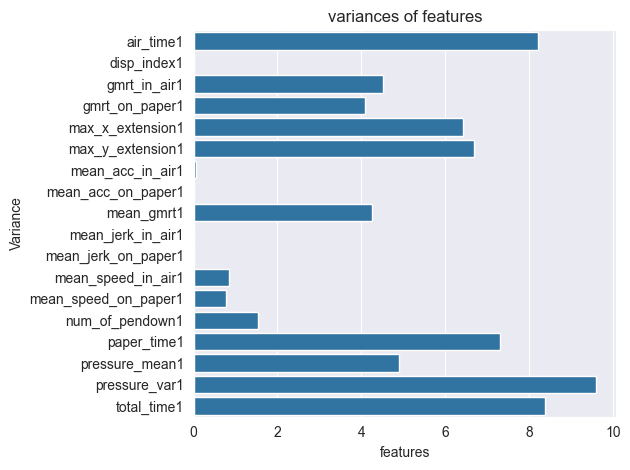

In [7]:
##variance/feature plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_log_var = np.log10(X_clean_var+1) ##log transform to handle outliers and better visuals

sns.barplot(y=X_log_var.index[:18], x=X_log_var.values[:18], orient='h') ##change index to group by task

plt.title("variances of features")
plt.ylabel("Variance")
plt.xlabel("features")
plt.tight_layout()
plt.show()

There is quite some variance for each feature.

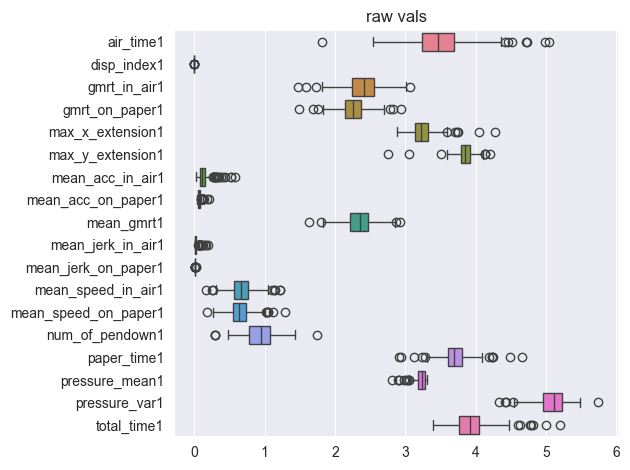

In [8]:
X_log = np.log10(X_clean+1)
sns.boxplot(data=X_log[X_log.columns[:18]], orient="h")
plt.title("raw vals")
plt.tight_layout()
plt.show()

Looking at raw values, this shows alot of variance (expected, many different features taken on different scales). Need to scale everything to give the machine meaningful, unbiased data.

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X_log), columns=X_log.columns) ##keep it a df, easier to work with

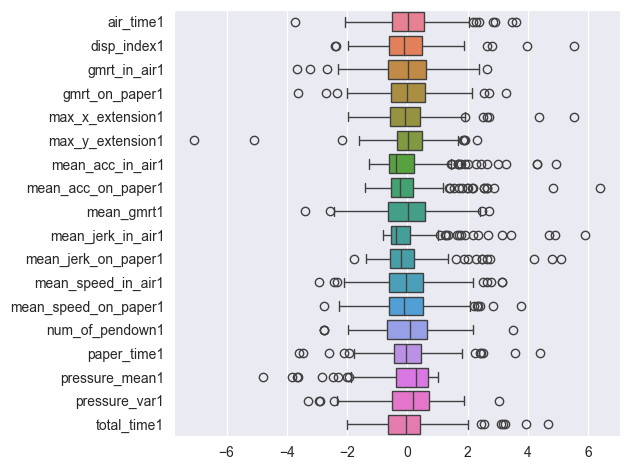

In [10]:
sns.boxplot(data=X_scaled[X_scaled.columns[:18]], orient="h")
plt.tight_layout()
plt.show()

**NOTE**</br>
This scaling is just for visualisation before I do anything concrete. When training the model, I will fit the scaler on the train set, and then apply the trained scaler on the train and test set.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_log, y_enc, test_size=0.2, stratify=y_enc, random_state=42)
print(f"training data: {X_train.shape}, test data: {X_test.shape}")

training data: (139, 450), test data: (35, 450)


In [12]:
## scaling on both train and test set, fit on train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [13]:
##putting them back into dfs so I can use them easily
X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns, index=X_train.index)
X_test_s  = pd.DataFrame(X_test_s, columns=X_test.columns, index=X_test.index)

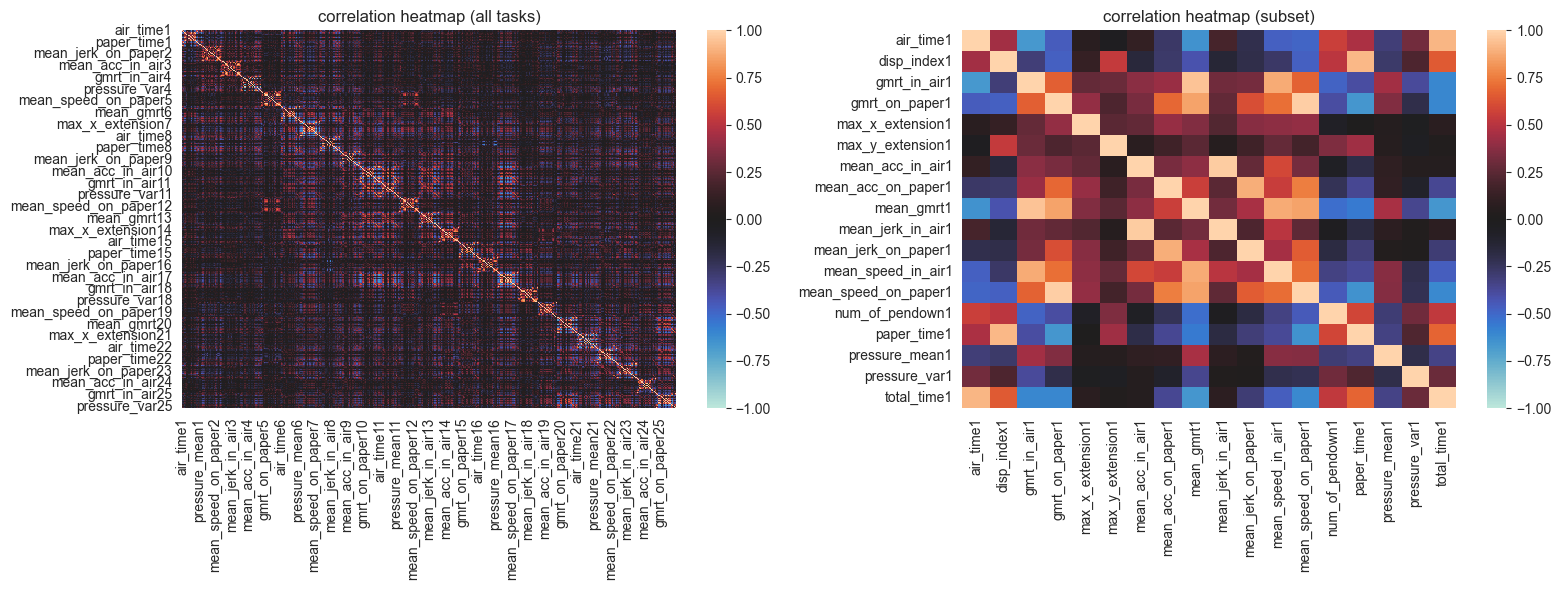

In [14]:
X_corr_alltsk = X_train_s[X_train_s.columns[:]].corr() ##correlation for all features, all tasks
X_corr_subtsk = X_train_s[X_train_s.columns[:18]].corr() ##change index/slice to see each feature group per task

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(X_corr_alltsk, vmin=-1, vmax=1, center=0, cbar=True, ax=axes[0])
axes[0].set_title("correlation heatmap (all tasks)")

sns.heatmap(X_corr_subtsk, vmin=-1, vmax=1, center=0, cbar=True, ax=axes[1])
axes[1].set_title("correlation heatmap (subset)")

plt.tight_layout()
plt.show()

Can see a lot of correlation here just by looking at the heatmap overall, and changing the index to view for each task.

In [15]:
X_corr = X_train_s.corr()
X_corr.head(5)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
air_time1,1.000000,0.440424,-0.668831,-0.456330,0.064863,-0.023823,0.113486,-0.271940,-0.643791,0.184041,...,-0.189489,-0.127993,-0.136038,-0.178691,-0.159900,0.089441,0.186363,-0.045397,0.050954,0.219294
disp_index1,0.440424,1.000000,-0.304761,-0.475878,0.122312,0.535205,-0.148854,-0.274927,-0.417410,-0.137355,...,-0.211782,-0.133111,0.033392,-0.147231,-0.191321,0.093023,0.139372,-0.078894,0.054815,0.243623
gmrt_in_air1,-0.668831,-0.304761,1.000000,0.670167,0.277374,0.294803,0.378413,0.419092,0.950550,0.311342,...,0.225502,0.198747,0.070609,0.249371,0.143707,-0.179292,-0.218477,0.112306,-0.054539,-0.235413
gmrt_on_paper1,-0.456330,-0.475878,0.670167,1.000000,0.403893,0.203237,0.334175,0.690614,0.858979,0.273077,...,0.191697,0.105170,-0.062263,0.177833,0.141162,-0.085139,-0.081859,0.148205,-0.023862,-0.115930
max_x_extension1,0.064863,0.122312,0.277374,0.403893,1.000000,0.243503,0.270253,0.413890,0.354962,0.218968,...,0.038677,-0.019643,-0.075716,0.024916,0.057856,0.014372,-0.017230,0.025334,0.092353,0.091071


In [16]:
thresh = 0.95 ##corr threshold

corr_matrix = X_train_s.corr().abs() ##corr filtering on X_train only

upper = corr_matrix.where(np.triu(np.ones_like(corr_matrix), k=1).astype(bool)) ##taking only the upper triangle so no duplicates

high_corr = (upper.stack().reset_index().rename(columns={0: "correlation"}))

high_corr = high_corr[high_corr["correlation"] > thresh] ##list of features > thresh

print(f"Highly correlated pairs (|corr| > {thresh})")
high_corr.sort_values(by="correlation", ascending=False)

Highly correlated pairs (|corr| > 0.95)


,level_0,level_1,correlation
93166,air_time19,total_time19,0.996785
93887,mean_acc_in_air19,mean_jerk_in_air19,0.996519
100961,mean_acc_in_air25,mean_jerk_in_air25,0.996329
82691,mean_acc_in_air15,mean_jerk_in_air15,0.994402
88313,gmrt_in_air17,mean_speed_in_air17,0.994139
...,...,...,...
37130,gmrt_in_air6,mean_speed_in_air6,0.955559
74234,gmrt_in_air13,mean_gmrt13,0.952436
59713,air_time10,total_time10,0.951864
82118,gmrt_on_paper15,mean_speed_on_paper15,0.951257


In [17]:
to_drop = set(high_corr["level_1"])  ##selecting which set of features to drop

print(f"dropping {len(to_drop)} features:")
print(to_drop)

##drop in train and test set
X_train_uncorr = X_train_s.drop(columns=to_drop)
X_test_uncorr  = X_test_s.drop(columns=to_drop)

print(f"New shapes: {X_train_uncorr.shape} {X_test_uncorr.shape}")

dropping 73 features:
{'total_time14', 'total_time10', 'mean_speed_on_paper21', 'mean_speed_in_air19', 'total_time23', 'mean_speed_in_air23', 'mean_jerk_in_air22', 'mean_jerk_in_air16', 'mean_jerk_in_air8', 'mean_jerk_in_air9', 'mean_speed_in_air14', 'mean_speed_on_paper1', 'mean_jerk_in_air23', 'total_time24', 'mean_speed_on_paper7', 'mean_speed_in_air24', 'total_time17', 'mean_speed_on_paper8', 'total_time22', 'total_time20', 'mean_jerk_in_air6', 'mean_speed_on_paper15', 'total_time6', 'mean_jerk_in_air15', 'max_y_extension5', 'mean_jerk_in_air10', 'total_time16', 'mean_speed_on_paper23', 'mean_jerk_in_air21', 'mean_jerk_in_air4', 'mean_jerk_in_air11', 'mean_jerk_in_air1', 'total_time7', 'mean_jerk_in_air24', 'total_time19', 'mean_speed_in_air25', 'mean_speed_on_paper11', 'mean_speed_on_paper20', 'mean_speed_on_paper4', 'mean_jerk_in_air25', 'mean_jerk_in_air13', 'mean_gmrt17', 'mean_jerk_in_air19', 'mean_speed_on_paper9', 'mean_speed_in_air22', 'mean_speed_on_paper17', 'mean_jerk_in

Dropped ~16% of the features which have 95% similarity. Can see that most of the features are related to speed, among others. </br>
Now dimensionality reduction. </br>

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42) ##keeping 95% explained variance

X_train_pca = pca.fit_transform(X_train_uncorr)
X_test_pca  = pca.transform(X_test_uncorr)

print("before PCA:", X_train_uncorr.shape)
print("after PCA:", X_train_pca.shape)

before PCA: (139, 377)
after PCA: (139, 84)


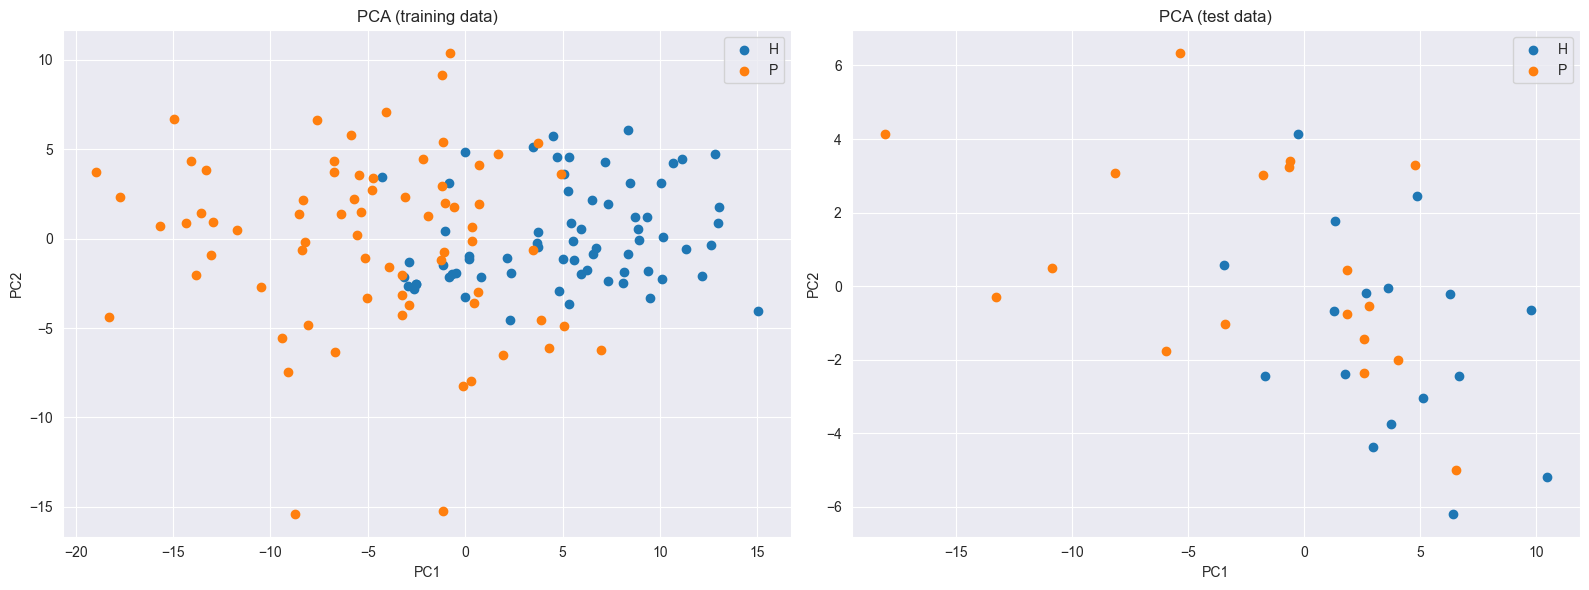

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

##X_train_pca plot
labels = ['H', 'P']

for i, label in enumerate(labels):
    class_data = X_train_pca[y_train == i]
    axes[0].scatter(class_data[:, 0], class_data[:, 1], label=label)

axes[0].set_title('PCA (training data)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
axes[0].grid(True)

##X_test_pca plot
labels = ['H', 'P']

for i, label in enumerate(labels):
    class_data = X_test_pca[y_test == i]
    axes[1].scatter(class_data[:, 0], class_data[:, 1], label=label)

axes[1].set_title('PCA (test data)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Shows some separability, which is surprising given the high dimensionality. I expected not much at all after a large number of features were dropped. This means that some patterns in the data are strong enough to remain visible even after reducing dimensionality.

I will use **SVM**, **Logistic Regression (LR)**, **Random Forest (RF)**, and **XGBoost (XGB)** as classifiers and then compare their performance:

- **SVM (SVC)**: Suitable for high-dimensional data, particularly when the number of features (p) is greater than the number of samples (n).  
- **Logistic Regression (LR)**: Acts as a simple baseline binary classifier. It serves as a benchmark against which more complex models can be compared.  
- **Random Forest (RF)**: Reduces overfitting by averaging across multiple trees. It does not require feature scaling and can often extract more information from each feature without the need for PCA.  
- **XGBoost (XGB)**: Handles non-linear relationships effectively and, like RF, does not require scaling or PCA. It is commonly considered a strong choice for structured tabular datasets such as this one.  

# ML Workflow and Analysis

## SVM

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'kernel': ['rbf'],
}

grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    parameter_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train_pca, y_train) ##use X where we applied PCA for SVM

,estimator,SVC(probabili...ndom_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.0001, 0.001, ...], 'kernel': ['rbf']}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [22]:
svm = SVC(C=1, gamma=0.001, probability=True, random_state=42)
svm.fit(X_train_pca, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Accuracy: 0.7714285714285715
F1 Score: 0.7333333333333333
ROC AUC: 0.8627450980392156
              precision    recall  f1-score   support

           H       0.70      0.94      0.80        17
           P       0.92      0.61      0.73        18

    accuracy                           0.77        35
   macro avg       0.81      0.78      0.77        35
weighted avg       0.81      0.77      0.77        35



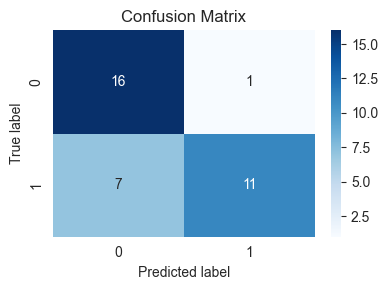

In [23]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
y_pred = svm.predict(X_test_pca)
y_prob = svm.predict_proba(X_test_pca)[:, 1] ##probabilities for class 1 (given by [:, 1])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print(classification_report(y_test, y_pred, target_names=['H', 'P']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()


## Logistic Regression

/Users/siddharth/Documents/code/python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddharth/Documents/code/python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddharth/Documents/code/python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddharth/Documents/code/python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/siddharth/Documents/code/python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means

Accuracy: 0.7142857142857143
F1 Score: 0.7058823529411765
Logistic Regression (L1) ROC AUC: 0.8235294117647058
              precision    recall  f1-score   support

           H       0.68      0.76      0.72        17
           P       0.75      0.67      0.71        18

    accuracy                           0.71        35
   macro avg       0.72      0.72      0.71        35
weighted avg       0.72      0.71      0.71        35



/Users/siddharth/Documents/code/python/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


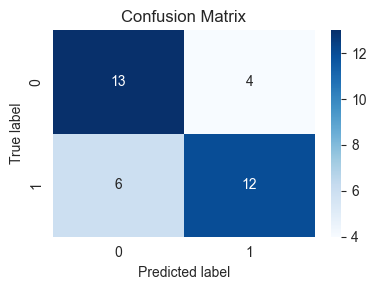

In [24]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV(penalty='l1', scoring='roc_auc', solver = 'saga', random_state=42)
log_reg.fit(X_train_uncorr, y_train)

y_pred_log = log_reg.predict(X_test_uncorr)
y_prob_log = log_reg.predict_proba(X_test_uncorr)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Logistic Regression (L1) ROC AUC:", roc_auc_score(y_test, y_prob_log))

print(classification_report(y_test, y_pred_log, target_names=['H', 'P']))

cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

## Random Forest

We can decide how many estimators to use (`n_estimators`) by plotting where the accuracy plateus.$^4$ </br>
(n_estimator plot adapted from https://www.kaggle.com/code/ahmedabdulhamid/best-n-estimators-for-randomforest/notebook)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_check = RandomForestClassifier(n_estimators=500, random_state=42, bootstrap=True, class_weight='balanced') ##set high n_estimators for plot

rf_check.fit(X_train_uncorr, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
X_test_np = np.asarray(X_test_uncorr) ##back to np array to make this work

predictions = []
for tree in rf_check.estimators_:
    predictions.append(tree.predict_proba(X_test_np)[None, :]) ##get predictions in each tree separately

In [27]:
predictions = np.vstack(predictions)  ##Concatenate the predictions to a tensor of size (number of trees, number of objects, number of classes)

In [28]:
##Сompute cumulative average of the predictions.
##That will be a tensor, that will contain predictions of the random forests for each n_estimators.
cum_mean = np.cumsum(predictions, axis=0) / np.arange(1, predictions.shape[0] + 1)[:, None, None]

In [29]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))

Text(0, 0.5, 'accuracy')

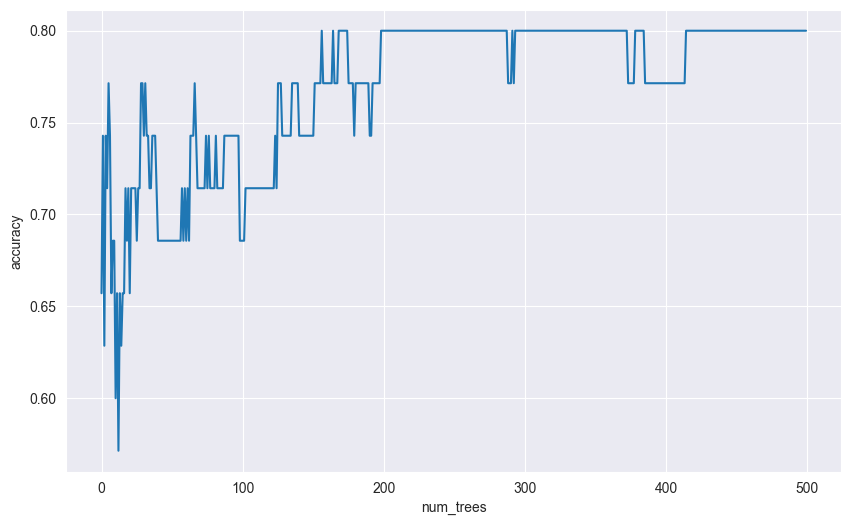

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(scores)
plt.xlabel('num_trees')
plt.ylabel('accuracy')

In [31]:
best_nest = scores.index(max(scores)) + 1 ##getting the index of the maximum score (index starts from 0)
print(f"Best number of trees: {best_nest}")

Best number of trees: 157


Final RF classifier

Accuracy: 0.8
F1 Score: 0.8205128205128205
Random Forest ROC AUC: 0.8627450980392157
              precision    recall  f1-score   support

           H       0.86      0.71      0.77        17
           P       0.76      0.89      0.82        18

    accuracy                           0.80        35
   macro avg       0.81      0.80      0.80        35
weighted avg       0.81      0.80      0.80        35



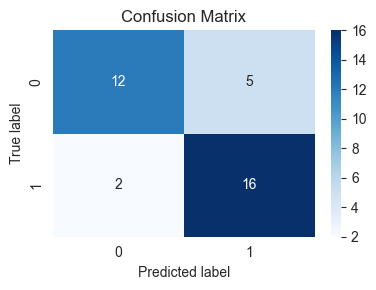

In [32]:
rf = RandomForestClassifier(n_estimators=157, random_state=42, bootstrap=True, class_weight='balanced') ##set high n_estimators for plot

rf.fit(X_train_uncorr, y_train) ##doesn't require PCA input, use X with dropped features from correlation analysis

y_pred_rf = rf.predict(X_test_uncorr)
y_prob_rf = rf.predict_proba(X_test_uncorr)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_prob_rf))

print(classification_report(y_test, y_pred_rf, target_names=['H', 'P']))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

## XGBoost

Deciding `n_estimators` the same way we did with RF.

In [33]:
from xgboost import XGBClassifier

xgb_check = XGBClassifier(n_estimators=500, random_state=42, eval_metric="auc")

xgb_check.fit(X_train_uncorr, y_train, eval_set=[(X_test_uncorr, y_test)]) ##eval accuracy on each test per round

[0]	validation_0-auc:0.80229
[1]	validation_0-auc:0.81863
[2]	validation_0-auc:0.81699
[3]	validation_0-auc:0.83170
[4]	validation_0-auc:0.81373
[5]	validation_0-auc:0.84150
[6]	validation_0-auc:0.86601
[7]	validation_0-auc:0.83660
[8]	validation_0-auc:0.87255
[9]	validation_0-auc:0.90850
[10]	validation_0-auc:0.90523
[11]	validation_0-auc:0.89869
[12]	validation_0-auc:0.86601
[13]	validation_0-auc:0.86601
[14]	validation_0-auc:0.87255
[15]	validation_0-auc:0.86928
[16]	validation_0-auc:0.87255
[17]	validation_0-auc:0.86275
[18]	validation_0-auc:0.87908
[19]	validation_0-auc:0.87582
[20]	validation_0-auc:0.88562
[21]	validation_0-auc:0.88235
[22]	validation_0-auc:0.89216
[23]	validation_0-auc:0.88889
[24]	validation_0-auc:0.88235
[25]	validation_0-auc:0.88562
[26]	validation_0-auc:0.88235
[27]	validation_0-auc:0.87908
[28]	validation_0-auc:0.88235
[29]	validation_0-auc:0.88889
[30]	validation_0-auc:0.88562
[31]	validation_0-auc:0.88562
[32]	validation_0-auc:0.88235
[33]	validation_0-au

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [34]:
results = xgb_check.evals_result()
auc_per_round = results["validation_0"]["auc"]

In [35]:
best_nest_xgb = auc_per_round.index(max(auc_per_round)) + 1
best_nest_xgb

10

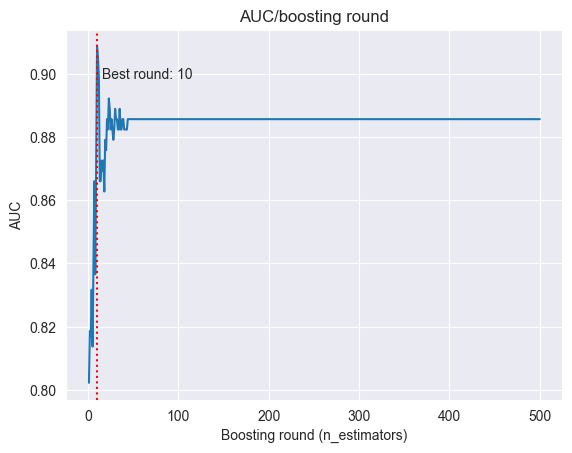

Best number of trees (round): 10 with AUC = 0.9084967320261438


In [36]:
##Plot AUC vs boosting round
plt.plot(range(1, len(auc_per_round)+1), auc_per_round)
plt.xlabel("Boosting round (n_estimators)")
plt.ylabel("AUC")
plt.title("AUC/boosting round")

# Highlight the best round
best_auc = max(auc_per_round)
plt.axvline(x=best_nest_xgb, color='r', linestyle=':')
plt.text(best_nest_xgb+5, best_auc-0.01, f"Best round: {best_nest_xgb}")

plt.show()

print(f"Best number of trees (round): {best_nest_xgb} with AUC = {max(auc_per_round)}")

Final XGB classifier

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=10, random_state=42, eval_metric="auc", bootstrap=True)

xgb.fit(X_train_uncorr, y_train)

/Users/siddharth/Documents/code/python/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [23:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "bootstrap" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


Accuracy: 0.8
F1 Score: 0.8205128205128205
XGBoost ROC AUC: 0.9084967320261438
              precision    recall  f1-score   support

           H       0.86      0.71      0.77        17
           P       0.76      0.89      0.82        18

    accuracy                           0.80        35
   macro avg       0.81      0.80      0.80        35
weighted avg       0.81      0.80      0.80        35



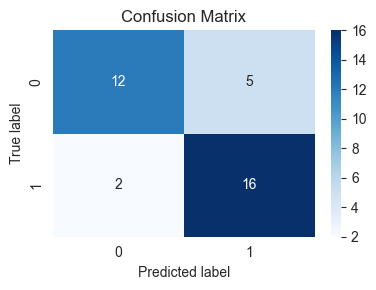

In [38]:
y_pred_xgb = xgb.predict(X_test_uncorr)
y_prob_xgb = xgb.predict_proba(X_test_uncorr)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

print(classification_report(y_test, y_pred_xgb, target_names=['H', 'P']))

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

## Comparing models

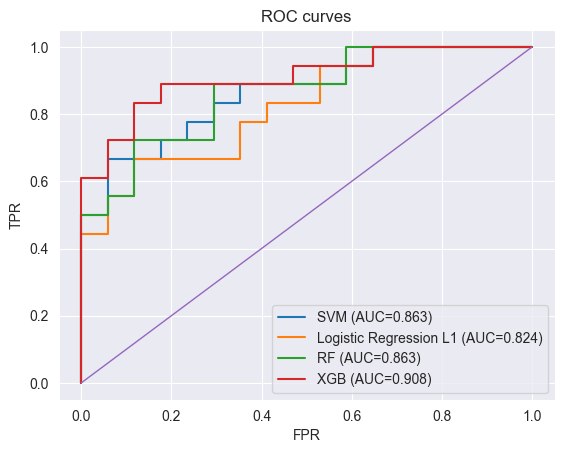

In [39]:
roc_scores = {"SVM (RBF + PCA)": roc_auc_score(y_test, y_prob),
              "Logistic Regression (L1)": roc_auc_score(y_test, y_prob_log),
              "Random Forest": roc_auc_score(y_test, y_prob_rf),
              "XGBoost": roc_auc_score(y_test, y_prob_xgb),
              }

from sklearn.metrics import roc_curve

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

##plotting ROC curves, label AUC upto 3 demical places
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={roc_scores['SVM (RBF + PCA)']:.3f})")
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression L1 (AUC={roc_scores['Logistic Regression (L1)']:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"RF (AUC={roc_scores['Random Forest']:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGB (AUC={roc_scores['XGBoost']:.3f})")
plt.plot([0,1],[0,1], linewidth=1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curves")
plt.legend()
plt.show()

### Model Performance Comparison

| Model                 | Accuracy | F1-Score (Weighted) | Precision (Weighted) | Recall (Weighted) | ROC AUC   |
| :-------------------- | :------: | :-----------------: | :------------------: | :---------------: | :-------: |
| **XGBoost** | 0.800    | 0.800               | 0.810                | 0.800             | **0.908** |
| Random Forest         | 0.800    | 0.800               | 0.810                | 0.800             | 0.863     |
| SVM                   | 0.771    | 0.770               | 0.810                | 0.770             | 0.863     |
| Logistic Regression | 0.714    | 0.710               | 0.720                | 0.710             | 0.824     |

# SHAP Results

Now we can see how explainable each feature is to the prediction made$^5$

In [40]:
import shap

pred = xgb.predict(X_test_uncorr, output_margin=True)

xgb_explainer = shap.TreeExplainer(xgb)
xgb_explination = xgb_explainer(X_test_uncorr)

xgb_shap_values = xgb_explination.values
np.abs(xgb_shap_values.sum(axis=1) + xgb_explination.base_values - pred).max()

/Users/siddharth/Documents/code/python/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


np.float32(4.7683716e-07)

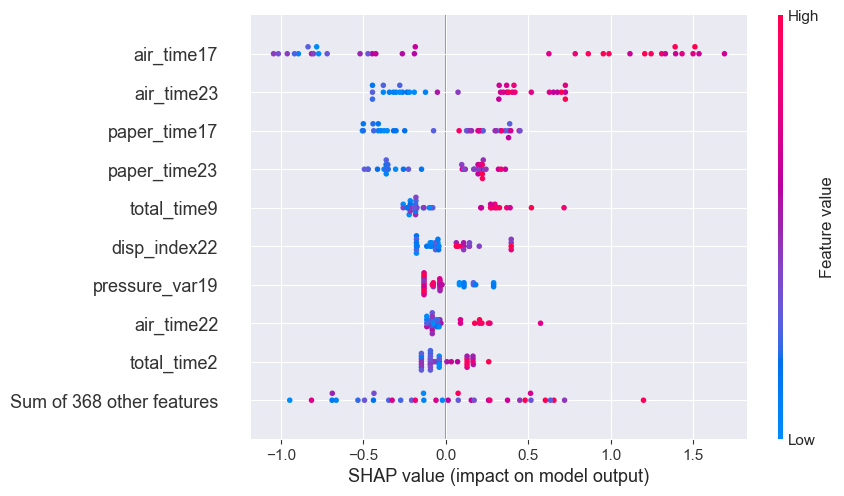

In [41]:
shap.plots.beeswarm(xgb_explination)

# Conclusion

XGBoost performs the best with AUC=0.908, as expected. This is probably because XGBoost can handle high dimensional data better, as it only takes a subset of features and makes a split, only focusing on what's important. It also takes into account complicated interactions by keeping the whole feature set (minus some very highly correlated features). It gets more 'context' of the data.</br></br>
The feature `air_time17` seems to be the most explainable feature. </br>
`air_time` is the time spent to perform in-air movements and task `17` is to copy six words (regular, non regular, non words) in the appropriate boxes.$^{1,2}$ </br></br>
Therefore, the most predictive feature for AD in this classifier is the time spent to perform in-air movements while copying 6 words in the appropriate boxes.

**Note:**</br>
SVM with default values, without PCA, without dropping correlated features were all tested. SVM with grid-search is computationally inexpensive, so it makes sense to keep it.</br>
RF, XGB, and LR were tested with and without PCA, with and without correlated values. </br>
LR was tested with L2 regularisation as well.</br>
These final model params were my initial choice as they made the most sense. Other params were tested out of curiosity.